## This is a quick walkthrough of the Laplace approximationa algorithm in inferrence of a posterior distribution of dynamic topic modeling
### [original paper link](http://repository.cmu.edu/cgi/viewcontent.cgi?article=2036&context=compsci)

### Data generation process:
For each topic k at time t=0 <br>
$\beta_{k,0} \sim N(0,I)$ <br>
<br>
For each topic k at time t $>$ 0 <br>
$\beta_{k,t} \sim N(\beta_{k,t-1},\sigma^2 I)$ <br>
<br>
For each document d at time t <br>
$\theta_{t,d} \sim Dirichlet(\alpha)$ <br>
<br>
For each word n at document d at time t<br>
$z_{t,d}^{n} \sim Discrete(\theta_{t,d})$<br>
$w_{t,d}^{n} \sim Discrete(\pi(\beta_{z_{t,d}^{n},t}))$<br>

### We first simulate some fake data per the above data generation process
### For simplicity, we assume each document is of the same length D

In [1]:
import numpy as np
from scipy import misc
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der
from simulate import *

In [2]:
from variational_inference import *

In [3]:
np.random.seed(seed=123)

### some hyper parameters

In [4]:
K = 5
V = 500
N = 40
D = 30
T = 10
sigma = 0.1
alpha_0 = np.array([1]*K)

In [5]:
document_sim, real_beta = simulate_data(K=K, V=V, N=N, D=D, T=T, sigma = sigma, alpha_0 = alpha_0)
print("glance of simulated data at t=0")
document_sim[0][:4]


topics= 5, vocab = 500, D = 30, N = 40, T =10
glance of simulated data at t=0


array([[ 181.,    1.,   95.,   58.,  306.,   80.,  496.,  222.,   73.,
         469.,  282.,  166.,   36.,   55.,  331.,  132.,   92.,  126.,
         399.,  141.,   20.,   57.,  283.,  270.,  256.,   92.,  148.,
          54.,  314.,    8.,  258.,  240.,  303.,  124.,  335.,  103.,
         259.,  105.,  210.,  304.],
       [ 247.,   52.,   18.,  375.,  362.,  426.,  382.,  439.,  371.,
          57.,  364.,   91.,  343.,  271.,  349.,  363.,  213.,  430.,
          68.,  249.,  391.,  371.,  271.,  491.,  259.,  470.,  324.,
         420.,  440.,  273.,  183.,   16.,   54.,  475.,  368.,  331.,
         178.,  454.,  231.,  103.],
       [ 389.,  334.,   17.,  314.,  448.,    4.,  116.,   65.,  409.,
         259.,  277.,   91.,   75.,  470.,  117.,  260.,   26.,  211.,
         141.,  231.,  427.,  228.,  270.,  141.,  305.,  414.,  120.,
         470.,  269.,  287.,  175.,  478.,  231.,  495.,   29.,  350.,
         438.,   23.,   87.,  495.],
       [ 209.,   27.,   82.,  395.,  

In [12]:
document_sim.shape

(10, 30, 40)

In [14]:
real_beta[0].shape

(5, 500)

In [6]:
VI =  variational_inference(T = T, D= D, K=K, N=N,V = V, iters=200, document = document_sim, sample_size = 1000)

In [ ]:
VI.train()

update takes 24 sec
ELBO calculation takes 0 sec
epoch = 0, elbo = -62648
phi[t=0][d=0][n=0]: [ 0.16755616  0.23459565  0.15884173  0.22727072  0.21173574]
update takes 25 sec
ELBO calculation takes 0 sec
epoch = 1, elbo = -62644
phi[t=0][d=0][n=0]: [ 0.169745    0.23248174  0.16136326  0.22563951  0.21077049]
update takes 25 sec
ELBO calculation takes 0 sec
epoch = 2, elbo = -62646
phi[t=0][d=0][n=0]: [ 0.1713251   0.23074622  0.16361379  0.22488916  0.20942573]
epoch = 3, elbo = -62632
phi[t=0][d=0][n=0]: [ 0.17280482  0.22908033  0.16544264  0.22366626  0.20900595]
epoch = 4, elbo = -62638
phi[t=0][d=0][n=0]: [ 0.17380635  0.22748222  0.16728059  0.222716    0.20871484]
epoch = 5, elbo = -62626
phi[t=0][d=0][n=0]: [ 0.17526238  0.22545139  0.16902398  0.22179091  0.20847134]
epoch = 6, elbo = -62623
phi[t=0][d=0][n=0]: [ 0.1768246   0.22390841  0.17083774  0.22079518  0.20763407]
epoch = 7, elbo = -62615
phi[t=0][d=0][n=0]: [ 0.17798513  0.22194384  0.17301308  0.22010995  0.206948 

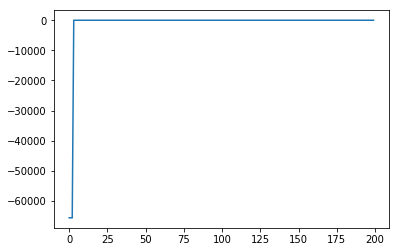

In [18]:
plt.plot(range(VI.iters),VI.ELBO_iter)
plt.show()

In [19]:
VI.mu_beta_t[0][0]

array([-0.29321627, -0.12749   ,  0.45210905,  0.89524806, -0.12522719,
       -0.36910768, -0.35650309,  0.06015394,  0.15585133, -0.0601214 ,
       -0.34875604,  0.00968762, -0.16273831, -0.40923823, -0.11954274,
       -0.26131289,  0.31248507, -0.42055271,  0.49128626, -0.57042216,
       -0.1372837 , -0.39164428,  0.3165389 ,  0.00140656,  0.25360884,
       -0.35672064,  0.34954823, -0.05380233, -0.28215706, -0.06784658,
        0.21332122,  0.0060246 , -0.29575984, -0.46677222, -0.37736683,
        0.84277454,  0.84506644,  0.62001576,  0.01135701,  0.21672454])

In [21]:
VI.mu_beta_t[1][0]

array([-0.29175428, -0.1271418 ,  0.45830929,  0.90632615, -0.12390987,
       -0.37197696, -0.3622443 ,  0.05881977,  0.15651099, -0.06584133,
       -0.3525124 ,  0.01269681, -0.16358441, -0.41244317, -0.11526824,
       -0.2672998 ,  0.31431326, -0.42541229,  0.49510344, -0.57586259,
       -0.1378049 , -0.39573832,  0.32068482,  0.00142207,  0.25632797,
       -0.35439888,  0.34295664, -0.05647751, -0.28478146, -0.06480302,
        0.21891803,  0.00380675, -0.2987307 , -0.4682813 , -0.3793331 ,
        0.85168074,  0.8474418 ,  0.62322852,  0.0055311 ,  0.22102955])

In [20]:
VI.mu_beta_t[0][1]

array([-0.29401347, -0.1347927 ,  0.42397632,  0.94709113, -0.11125612,
       -0.38234314, -0.37161342,  0.0700861 ,  0.16732529, -0.07945175,
       -0.36608403,  0.02435243, -0.1799848 , -0.43662101, -0.13615017,
       -0.27979216,  0.30833201, -0.43951006,  0.48260859, -0.58589291,
       -0.16599693, -0.40056747,  0.26512913,  0.03120364,  0.26467144,
       -0.36722056,  0.36780514, -0.05429989, -0.30067906, -0.05807905,
        0.20779411, -0.00791177, -0.30817168, -0.47468589, -0.37566135,
        0.90439204,  0.83716329,  0.66945278,  0.00909627,  0.33111097])

### ELBO for each word
### $ \mathbb{E}_{q(\theta)q(z)q(\beta)}[log p(z_{t,d}^{n}| \theta_{t,d}) + log p(w_{t,d}^{n} |z_{t,d}^{n}, \beta_{t}) ] $
### $ = \mathbb{E}_{q(\theta)q(z)} log \prod {\theta_{t,d}^k} ^ {\mathbb{1}(z_{t,d}^{n}=k)} + \mathbb{E}_{q(z)q(\beta)} log [\pi (\beta_{t,z})_{w})]$
### $ = \mathbb{E}_{q(\theta)q(z)} \Sigma_{k=1}^{K} {\mathbb{1}(z_{t,d}^{n}=k)}{log(\theta_{t,d}^k)}+ \mathbb{E}_{q(z)q(\beta)} log \frac{exp(\beta_{t,z}^{w})}{\Sigma_{v=1}^{V}exp(\beta_{t,z}^{v})}$
### $ = \Sigma_{k=1}^{K} \mathbb{E}_{q(z)}{\mathbb{1}(z_{t,d}^{n}=k)}\mathbb{E}_{q(\theta)}{log(\theta_{t,d}^k)}+ \mathbb{E}_{q(z)q(\beta)} \beta_{t,z}^{w} - \mathbb{E}_{q(z)q(\beta)}log{\Sigma_{v=1}^{V}exp(\beta_{t,z}^{v})}$
###  $ = \Sigma_{k=1}^{K} \phi_{t,d}^{n,k}[\psi(\alpha_{t,d}^{k})-\psi(\Sigma_{j=1}^{K} \alpha_{t,d}^{j})] + \Sigma_{k=1}^{K} \phi_{t,d}^{n,k} \mathbb{E}_{q(\beta)}\beta_{t,k}^{w} - \Sigma_{k=1}^{K} \phi_{t,d}^{n,k} \mathbb{E}_{q(\beta)}log{\Sigma_{v=1}^{V}exp(\beta_{t,k}^{v})}$
### $= \Sigma_{k=1}^{K} \phi_{t,d}^{n,k}[\psi(\alpha_{t,d}^{k})-\psi(\Sigma_{j=1}^{K} \alpha_{t,d}^{j})+\hat{\beta}_{t,k}^{w} - \mathbb{E}_{q(\beta)}log{\Sigma_{v=1}^{V}exp(\beta_{t,k}^{v})} ]$
### $ = <\phi_{t,d}^{n}, \nu>$ where $\nu$ is a k-dim vector of the above [ . ]



In [21]:
sigma = 0.1
mu_beta_t = np.zeros((T,K,V))


In [25]:
np.dot(mu_beta_t[1][0],np.zeros(V))

0.0

In [42]:
def gradient_descent_beta_0(k):
		# find mode of f(beta) for topic k, or argmin of -f(beta)
		b_val=VI.B_func(k, 0)
		print (b_val)
		fn = lambda beta: sum(b_val)*misc.logsumexp(beta) + 0.5*np.dot(beta,beta)+0.5/(sigma ** 2)*np.dot(beta,beta)  \
						  -1.0/(sigma ** 2)*np.dot(mu_beta_t[1][k],beta) - np.dot(b_val,beta)
		res = minimize(fn, np.zeros(V), method='SLSQP')
		return res.x

In [43]:
gradient_descent_beta_0(0)

[ 0.9721798   2.46581516  3.44943762  2.81773588  1.42188582  4.13926261
  2.68356306  1.08347345  2.41848312  1.43145707  0.79428081  2.29031376
  1.37628041  1.69388171  1.48885897  3.67032398  1.12066492  0.7013976
  0.72593331  3.74211005  3.29940863  2.97436223  1.6055524   1.50354636
  0.22613523  0.81202214  0.96311194  2.99879647  1.38844294  3.73827541
  1.62877744  2.34350388  3.38847099  1.17303244  1.26562711  3.76226273
  0.15166374  0.80083004  3.12762528  2.19700618]


array([-0.00993966,  0.00456341,  0.01411244,  0.00798007, -0.0055727 ,
        0.02080835,  0.00667749, -0.00885888,  0.00410389, -0.00547973,
       -0.01166727,  0.00285953, -0.00601551, -0.00293155, -0.00492236,
        0.01625664, -0.00849776, -0.01256932, -0.01233103,  0.01695344,
        0.01265608,  0.00950064, -0.00378922, -0.00477976, -0.01718499,
       -0.011495  , -0.01002777,  0.00973783, -0.00589743,  0.01691623,
       -0.00356372,  0.00337593,  0.01352066, -0.00798919, -0.00709005,
        0.01714905, -0.01790828, -0.01160371,  0.01098847,  0.00195355])